In [83]:
%load_ext autoreload
%autoreload 2
import pickle
from ofa.accuracy_network import AccNet, LatNet
from ofa.utils import get_device
import matplotlib.pyplot as plt
import numpy as np
from evo_search_test import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
device = get_device()
num_blocks = 5
kernel_choices = [3, 5]
depth_choices = [2, 3, 4]
expansion_ratio_choices = [3, 4, 6]

def get_chart(path, filt=False, rounding=3, do_avg=1):
    with open(path, "rb") as f:
        lst = pickle.load(f)
    acc = []
    lat = []

    for arch in lst:
        acc.append(np.abs(arch.acc))
        lat.append(np.abs(arch.lat))

    if filt:
        acc = [x for _, x in sorted(zip(lat, acc))]
        lat = [y for y, _ in sorted(zip(lat, acc))]
        clipped_long = [round(y, rounding) for y, _ in sorted(zip(lat, acc))]
        clipped = sorted(list(set(clipped_long)))
        i = 0
        highest_accs = []
        
        for val in clipped:
            first_i = i
            
            while i < len(lat) and np.isclose(clipped_long[i], val):
                i += 1
            
            if i - first_i > 0:
                arr = sorted(acc[first_i:i])[-do_avg:]
                avg = sum(arr)/ len(arr)
                highest_accs.append(avg)
        
        acc = highest_accs
        lat = clipped
            


    x = 1000 * np.array(lat)
    y = 100 * np.array(acc)
    
    plt.scatter(x, y)
    plt.title("Latency vs. Accuracy")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Accuracy (%)")
    plt.savefig(path.split(".")[0] + f"-{str(filt)}-{str(rounding)}-{str(do_avg)}.png")
    plt.show()

In [85]:
acc_net = AccNet(device=device, num_blocks=num_blocks, kernel_choices=kernel_choices, depth_choices=depth_choices, expansion_ratio_choices=expansion_ratio_choices)
lat_net = LatNet(device=device, num_blocks=num_blocks, kernel_choices=kernel_choices, depth_choices=depth_choices, expansion_ratio_choices=expansion_ratio_choices)

In [86]:
%%capture
P = 1600
C = 800
S = 400
dataset = "cifar10"
main(P, C, S, dataset)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 781/781 [00:56<00:00, 13.79it/s]


Seconds:
1026.6102256774902

40706
Dict: {'depths': [4, 4, 4, 4, 4], 'kernel_sizes': [[3, 3, 5, 5], [3, 3, 5, 5], [5, 3, 3, 3], [3, 3, 5, 5], [5, 5, 5, 5]], 'expansion_ratios': [[4, 6, 4, 6], [3, 4, 4, 3], [6, 4, 3, 3], [3, 6, 6, 3], [4, 3, 6, 6]]}
Acc: 1.101056054252675 Latency: 0.0032310296151571646 Mutations: 1



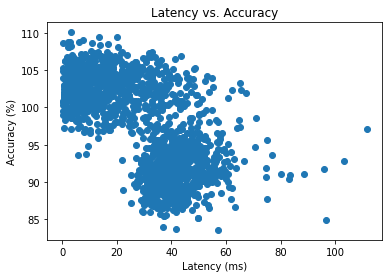

In [87]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl")

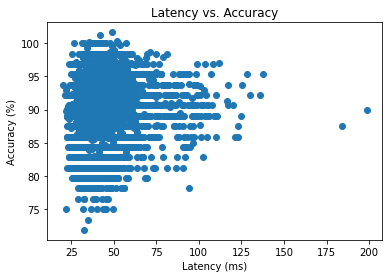

In [88]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl")

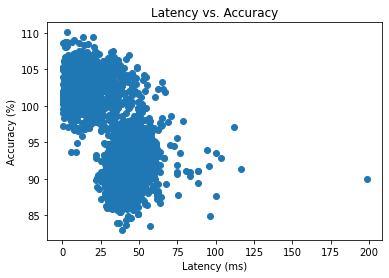

In [89]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl")

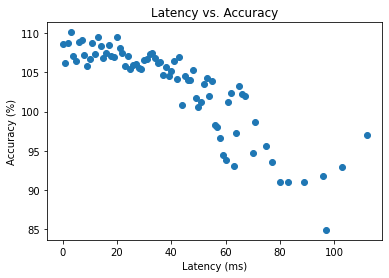

In [90]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True)

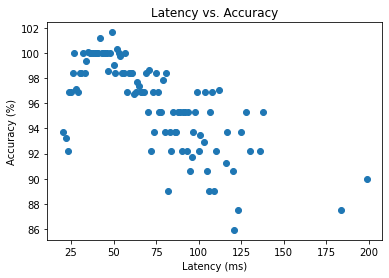

In [91]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True)

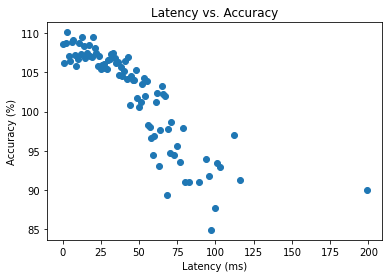

In [92]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True)

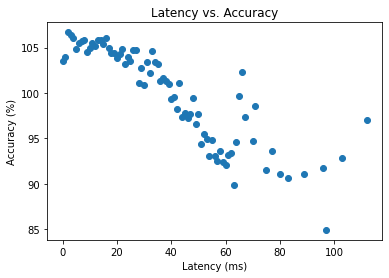

In [93]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10)

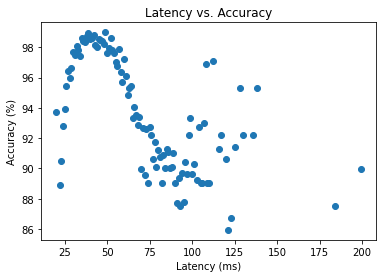

In [94]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=10)

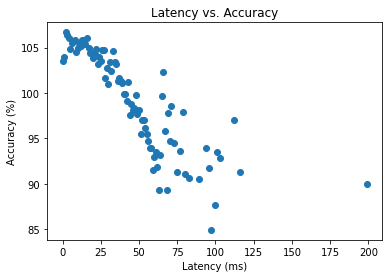

In [95]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=10)

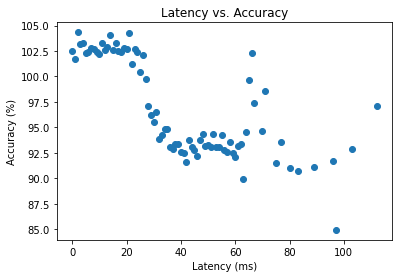

In [96]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10000000000000000000000000000000000000)

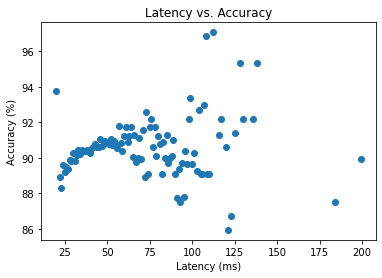

In [97]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=1000000000000000000000000000000000000000000)

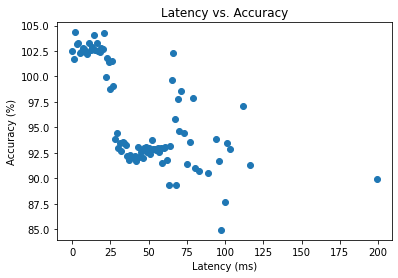

In [98]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=100000000000000000000000000000000000000000)

In [99]:
%%capture
P = 1600
C = 800
S = 400
dataset = "mnist"
main(P, C, S, dataset)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 781/781 [00:51<00:00, 15.14it/s]


Seconds:
1054.5895342826843

58671
Dict: {'depths': [4, 4, 4, 4, 4], 'kernel_sizes': [[5, 5, 5, 5], [3, 5, 5, 3], [3, 5, 5, 5], [5, 3, 5, 5], [5, 3, 5, 3]], 'expansion_ratios': [[4, 6, 4, 3], [3, 4, 4, 3], [3, 3, 3, 6], [3, 3, 4, 3], [4, 6, 6, 6]]}
Acc: 1.1077969018771685 Latency: 0.011307835598650916 Mutations: 1



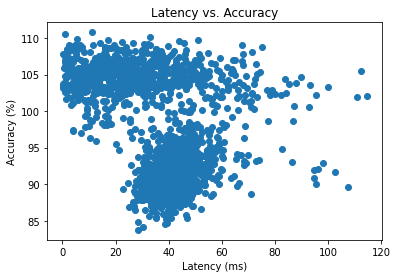

In [100]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl")

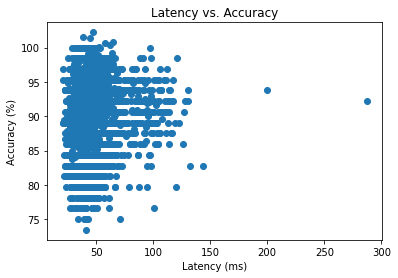

In [101]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl")

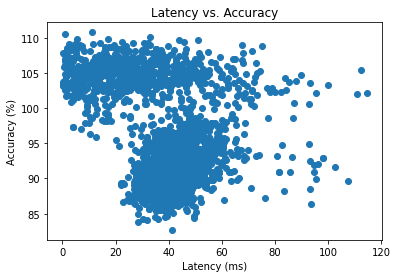

In [102]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl")

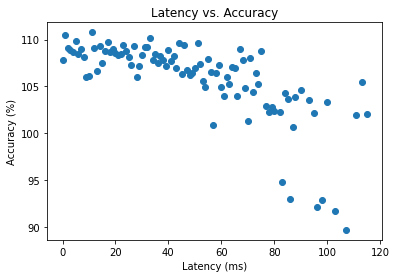

In [103]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True)

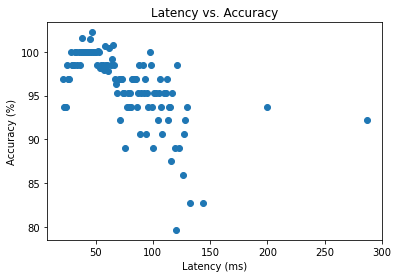

In [104]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True)

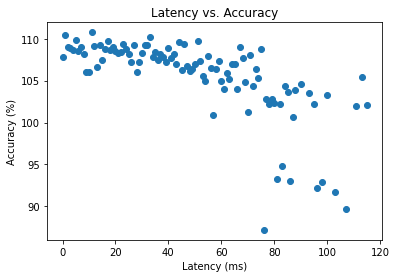

In [105]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True)

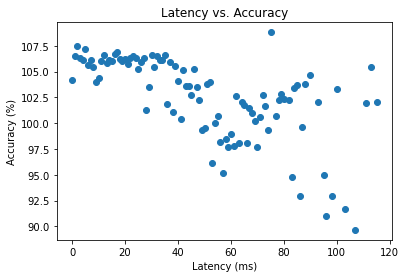

In [106]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10)

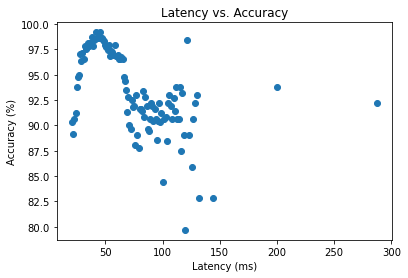

In [107]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=10)

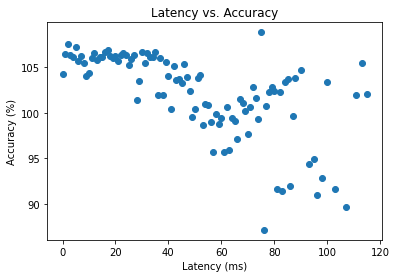

In [108]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=10)

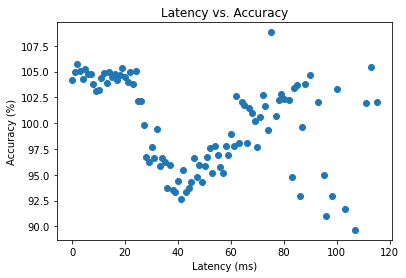

In [109]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10000000000000000000000000000000000000)

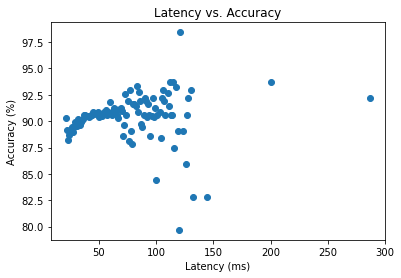

In [110]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=1000000000000000000000000000000000000000000)

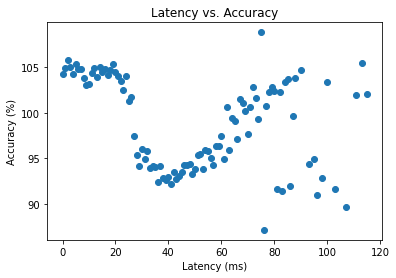

In [111]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=100000000000000000000000000000000000000000)

In [112]:
%%capture
P = 16000
C = 8000
S = 4000
dataset = "cifar10"
main(P, C, S, dataset)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 781/781 [00:46<00:00, 16.64it/s]


Seconds:
978.20916223526

69203
Dict: {'depths': [4, 4, 4, 4, 4], 'kernel_sizes': [[5, 3, 5, 3], [5, 5, 3, 3], [3, 3, 5, 5], [3, 5, 5, 3], [5, 3, 3, 3]], 'expansion_ratios': [[6, 6, 4, 6], [4, 3, 4, 3], [6, 4, 4, 3], [6, 6, 3, 3], [3, 6, 3, 3]]}
Acc: 1.2393165508506088 Latency: -0.030750515764660695 Mutations: 1



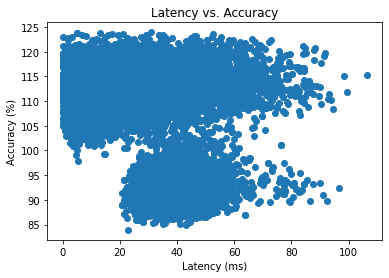

In [113]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl")

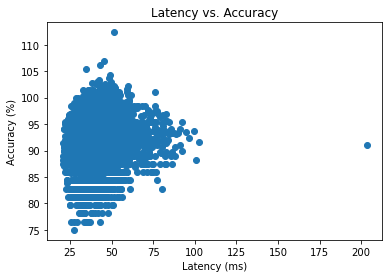

In [114]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl")

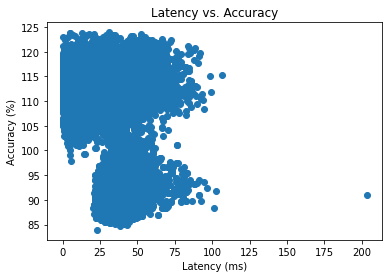

In [115]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl")

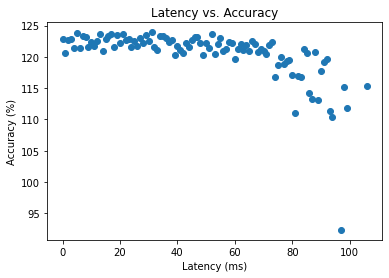

In [116]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True)

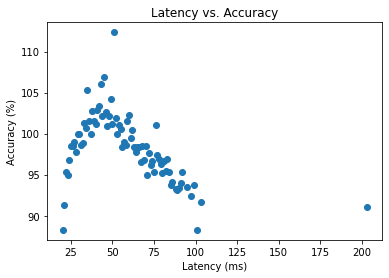

In [117]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True)

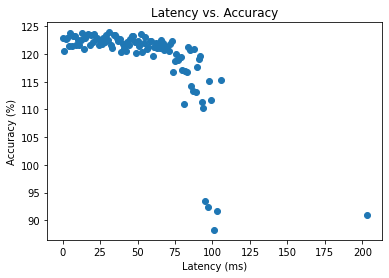

In [118]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True)

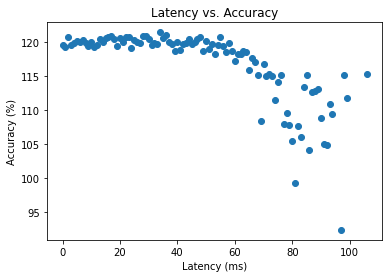

In [119]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10)

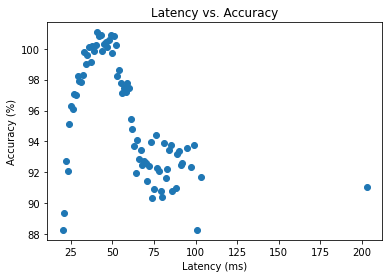

In [120]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=10)

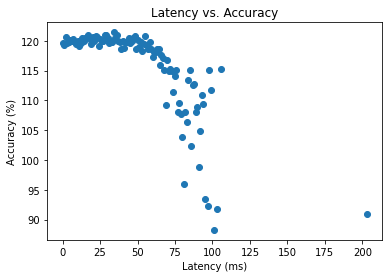

In [121]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=10)

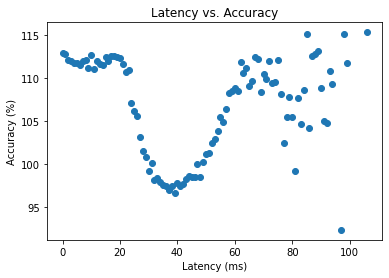

In [122]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10000000000000000000000000000000000000)

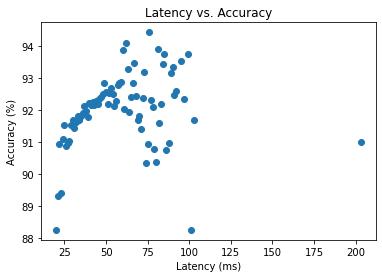

In [123]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=1000000000000000000000000000000000000000000)

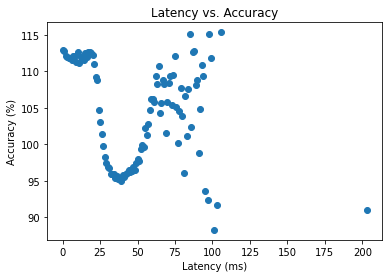

In [124]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=100000000000000000000000000000000000000000)

In [125]:
%%capture
P = 16000
C = 8000
S = 4000
dataset = "mnist"
main(P, C, S, dataset)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 781/781 [00:47<00:00, 16.44it/s]


Seconds:
980.888685464859

88844
Dict: {'depths': [4, 4, 4, 4, 4], 'kernel_sizes': [[5, 5, 5, 5], [3, 3, 3, 3], [5, 3, 3, 3], [3, 5, 5, 3], [5, 5, 3, 5]], 'expansion_ratios': [[4, 6, 4, 3], [6, 6, 4, 4], [3, 4, 6, 3], [4, 6, 6, 3], [3, 6, 6, 6]]}
Acc: 1.152724541198443 Latency: 0.01662508409691625 Mutations: 1



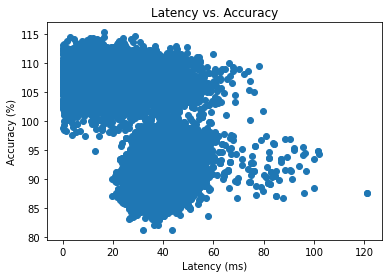

In [126]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl")

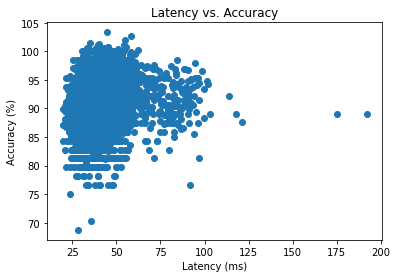

In [127]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl")

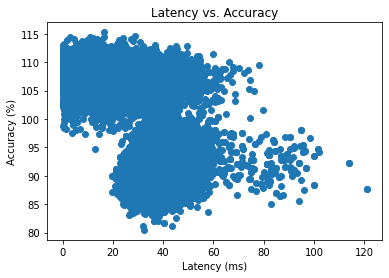

In [128]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl")

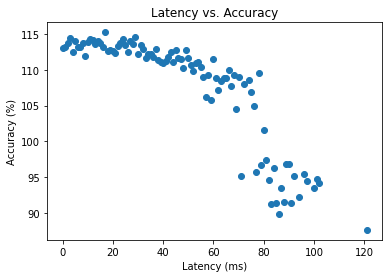

In [129]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True)

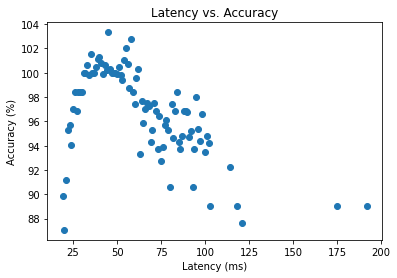

In [130]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True)

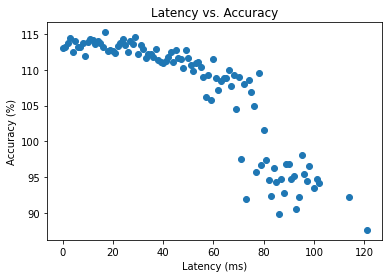

In [131]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True)

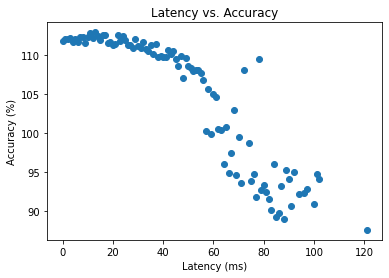

In [132]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10)

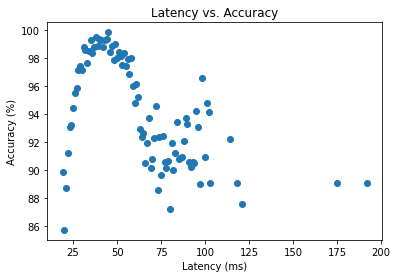

In [133]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=10)

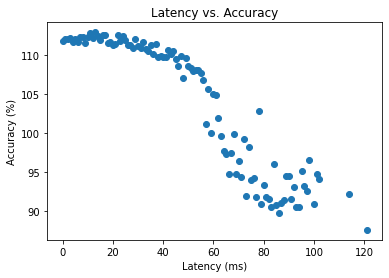

In [134]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=10)

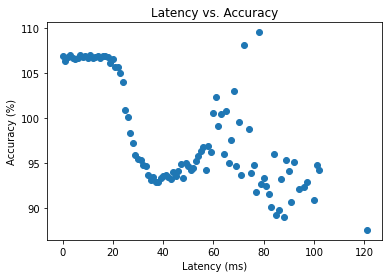

In [135]:
get_chart(f"{dataset}-pop{P}-{C}-{S}.pkl", filt=True, do_avg=10000000000000000000000000000000000000)

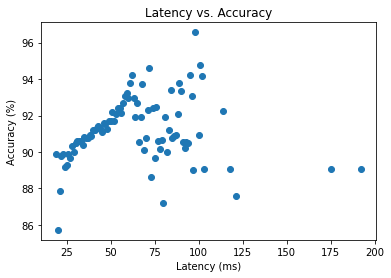

In [136]:
get_chart(f"{dataset}-a_list{P}-{C}-{S}.pkl", filt=True, do_avg=1000000000000000000000000000000000000000000)

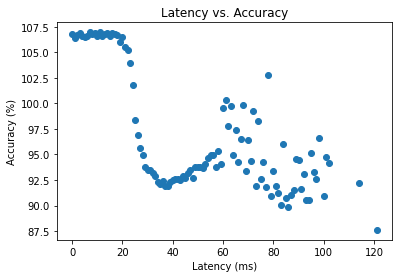

In [137]:
get_chart(f"{dataset}-history{P}-{C}-{S}.pkl", filt=True, do_avg=100000000000000000000000000000000000000000)